In [ ]:
#importing the nescessary llibraies for  the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
hotel  = pd.read_csv("/content/drive/MyDrive/TripAdvisorRestauarantRecommendation.csv")
hotel.head(3)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              3062 non-null   object
 1   Street Address    3062 non-null   object
 2   Location          3062 non-null   object
 3   Type              3049 non-null   object
 4   Reviews           3062 non-null   object
 5   No of Reviews     3062 non-null   object
 6   Comments          2447 non-null   object
 7   Contact Number    3062 non-null   object
 8   Trip_advisor Url  3062 non-null   object
 9   Menu              3062 non-null   object
 10  Price_Range       3062 non-null   object
dtypes: object(11)
memory usage: 263.3+ KB


In [ ]:
hotel.describe()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
count,3062,3062,3062,3049,3062,3062,2447,3062,3062,3062,3062
unique,2641,2814,2653,669,6,811,2291,2850,2886,705,6
top,Texas Roadhouse,3333 Bristol St,"Costa Mesa, CA 92626-1873","Italian, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,58 reviews,"The most warn and welcoming environment, Excel...",Not Available,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
freq,13,8,8,137,1956,18,4,19,4,2253,2385


In [ ]:
hotel.nunique()

Name                2641
Street Address      2814
Location            2653
Type                 669
Reviews                6
No of Reviews        811
Comments            2291
Contact Number      2850
Trip_advisor Url    2886
Menu                 705
Price_Range            6
dtype: int64

In [ ]:
hotel.Reviews.unique()

array(['4.5 of 5 bubbles', '4 of 5 bubbles', '5 of 5 bubbles',
       '3.5 of 5 bubbles', '3 of 5 bubbles', 'No review'], dtype=object)

In [ ]:
hotel.Price_Range.unique()

array(['$$ - $$$', '$$$$', '$', 'American', 'Not Specified', 'Italian'],
      dtype=object)

In [ ]:
hotel.shape

(3062, 11)

In [ ]:
hotel.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')

In [ ]:
hotel.drop(columns=['Trip_advisor Url','Contact Number'],inplace=True)

In [ ]:
hotel.head(3)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$


In [ ]:
hotel.Menu.value_counts()
hotel.drop(columns=['Menu'],inplace=True)

In [ ]:
hotel[hotel['Reviews']=='No review']

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [ ]:
hotel['No of Reviews']

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [ ]:
hotel.drop([1744,2866],axis=0,inplace=True)

In [ ]:

hotel[hotel['Comments']=='No Comments']

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range


In [ ]:
hotel.isnull().sum()

Name                0
Street Address      0
Location            0
Type               11
Reviews             0
No of Reviews       0
Comments          615
Price_Range         0
dtype: int64

In [ ]:
hotel.Comments.replace(np.nan,'',inplace=True)

In [ ]:
hotel.Type.replace(np.nan,'',inplace=True)
hotel.reset_index(inplace=True)

In [ ]:
location = hotel.Location.value_counts()

In [ ]:
import itertools
types = []
for i in range(len(hotel)):
  if type(hotel.Type[i]) == str:
    types.append(hotel.Type[i].split(','))
final_flat = list(itertools.chain(*types))
seris_val = pd.Series(final_flat)

In [ ]:
seris_val

0                    Seafood
1        Vegetarian Friendly
2              Vegan Options
3                      Diner
4                   American
                ...         
8633           Vegan Options
8634     Gluten Free Options
8635                 Italian
8636     Vegetarian Friendly
8637           Vegan Options
Length: 8638, dtype: object

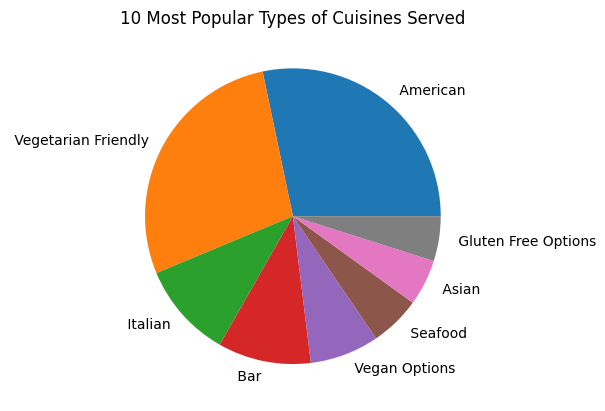

In [ ]:
ax = pd.Series(seris_val).value_counts()[:8].plot(kind='pie')
plot = ax.set_title("10 Most Popular Types of Cuisines Served")

In [ ]:
pd.DataFrame({'No of Restuarants Serving':seris_val.value_counts()}).head(10)


,No of Restuarants Serving
American,1558
Vegetarian Friendly,1542
Italian,577
Bar,561
Vegan Options,417
Seafood,305
Asian,278
Gluten Free Options,270
Pizza,254
Steakhouse,229


In [ ]:
#splits the all the values in location properly
hotel['State'] = [i.split(',')[-1].split(' ')[1] for i in hotel.Location]
hotel['state_code_zip'] = [i.split(',')[-1].split(' ')[-1] for i in hotel.Location]
hotel['state_name'] = [",".join(i.split(",")[:-1]) for i in hotel.Location]

In [ ]:
hotel.drop(columns=['Location'],inplace=True)
hotel.head()

,index,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,state_code_zip,state_name
0,0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco
1,1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse


In [ ]:
top = hotel.State.value_counts()[:5]
series_top_country = pd.Series(top)

<Axes: >

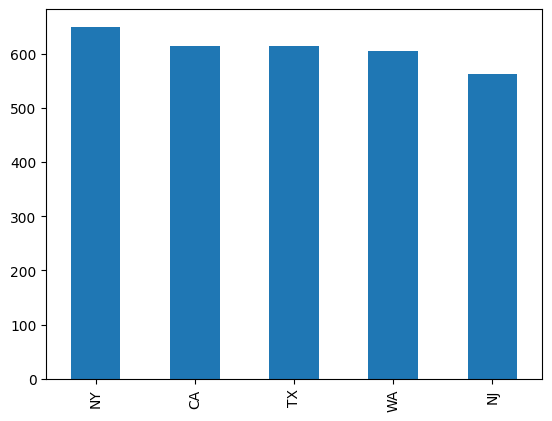

In [ ]:
 series_top_country.plot(kind='bar')

In [ ]:
hotel.head()


,index,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,state_code_zip,state_name
0,0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco
1,1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse


In [ ]:
hotel['Reviews1']  = [float(i.split(' ')[0]) for i in hotel.Reviews]
hotel['No of Reviews1']  = [float(i.split(' ')[0].replace(',','') ) for i in hotel['No of Reviews']]
hotel['weighted_ratio'] = hotel['Reviews1']*hotel['No of Reviews1']

In [ ]:
hotel.head()

,index,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,state_code_zip,state_name,Reviews1,No of Reviews1,weighted_ratio
0,0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco,4.5,243.0,1093.5
1,1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack,4.0,84.0,336.0
2,2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie,4.0,256.0,1024.0
3,3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano,4.5,235.0,1057.5
4,4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse,4.0,285.0,1140.0


In [ ]:
labels = hotel.State.unique().flatten()
values = [hotel[hotel.State==i].weighted_ratio.max() for i in labels]

<Axes: >

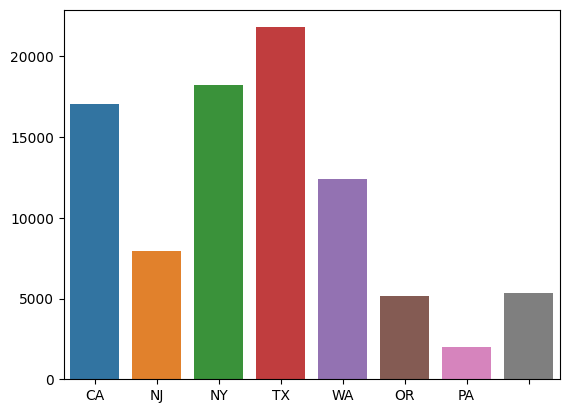

In [ ]:
sns.barplot(y=values,x=labels) # max rated hotels in the different states

In [ ]:
hotel[hotel.weighted_ratio==hotel.weighted_ratio.max()]

,index,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,state_code_zip,state_name,Reviews1,No of Reviews1,weighted_ratio
2164,2165,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4 of 5 bubbles,"5,448 reviews",Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,4.0,5448.0,21792.0


In [ ]:
hotel[hotel['No of Reviews'] == hotel['No of Reviews'].max()]

,index,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,state_code_zip,state_name,Reviews1,No of Reviews1,weighted_ratio
2456,2457,Le Vallauris,385 W Tahquitz Canyon Way,"French, International, European",4.5 of 5 bubbles,997 reviews,,$$$$,CA,92262-5647,"Palm Springs, Greater Palm Springs",4.5,997.0,4486.5


<Axes: >

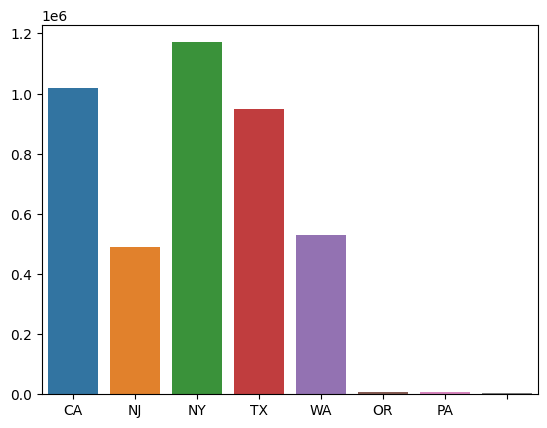

In [ ]:
labels = hotel.State.unique().flatten()
total_vote_share_list = [hotel[hotel.State==i].weighted_ratio.sum() for i in labels]
sns.barplot(y=total_vote_share_list,x=labels)

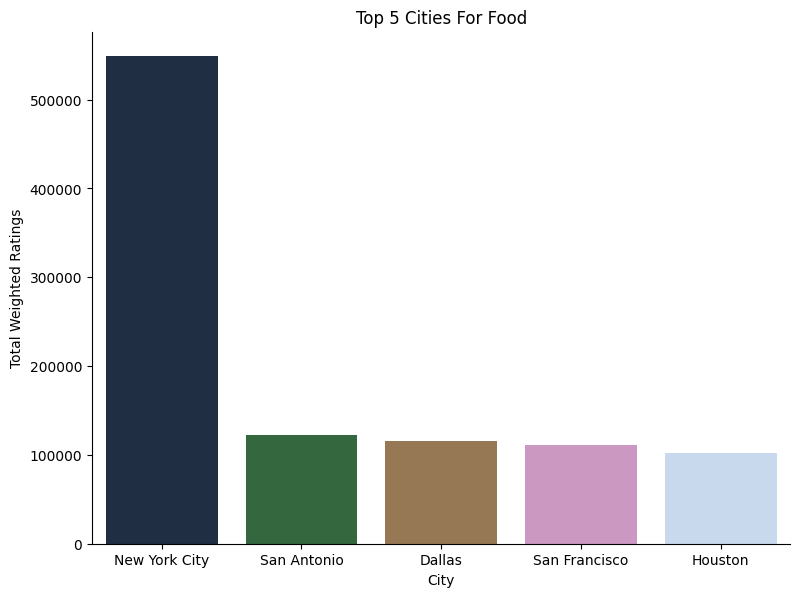

In [ ]:
labels = hotel.state_name.unique().flatten()
total_vote_share_list = [hotel[hotel.state_name==i].weighted_ratio.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'City':labels, 'Total Weighted Ratings': total_vote_share_list})
total_wt_ratings = total_wt_ratings.sort_values(by=['Total Weighted Ratings'],ascending=False).head(5)
plot = sns.catplot(x='City', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="cubehelix")
plt.title("Top 5 Cities For Food")
plt.gcf().set_size_inches(9, 6)

<h1> We will be using Content Based Filtering filter

In [ ]:
#### Our Main Feature - Comments
hotel.Comments


0                                                        
1       Both times we were there very late, after 11 P...
2       Waitress was very friendly but a little pricey...
3       Not sure why I went there for the second time....
4       Doesn't look like much from the outside but wa...
                              ...                        
3055    We had to wait a few minutes to get it but it ...
3056    Came here to see Andrea Gibson perform, we wer...
3057    We come to Brio once a month. They are good fo...
3058    Stopped in yesterday for Breakfast. When in Je...
3059    First time for dinner. 2 couples. Delicious mu...
Name: Comments, Length: 3060, dtype: object

In [ ]:
### Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
tfidf = TfidfVectorizer(stop_words='english')

### Construct the required tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(hotel.Comments)

### Output Shape of tf-idf matrix
tfidf_matrix.shape

(3060, 6244)

In [ ]:
print(tfidf_matrix)

  (1, 4058)	0.17814255826395484
  (1, 6104)	0.27578332320099125
  (1, 4411)	0.20903410300297912
  (1, 2409)	0.20286442549619405
  (1, 5866)	0.33652177978477826
  (1, 4928)	0.2002740700947816
  (1, 3250)	0.32014807127891776
  (1, 2219)	0.16810811756694735
  (1, 6049)	0.33652177978477826
  (1, 4605)	0.1923750043765901
  (1, 2231)	0.2859320366406957
  (1, 1655)	0.2551548900914339
  (1, 5653)	0.13918919006003586
  (1, 4206)	0.2551548900914339
  (1, 9)	0.2551548900914339
  (1, 3094)	0.2145493691861782
  (1, 5657)	0.17469551126316166
  (2, 1116)	0.28980025896643463
  (2, 1119)	0.3347027690546711
  (2, 2222)	0.3789359913031287
  (2, 5934)	0.27279384198194556
  (2, 6118)	0.3411273948598304
  (2, 3459)	0.19053599815796304
  (2, 1565)	0.1814238201842578
  (2, 1654)	0.3190107837356016
  :	:
  (3059, 3630)	0.22733137363381858
  (3059, 4644)	0.19902570390633048
  (3059, 5582)	0.18876175758265312
  (3059, 4256)	0.1900451932379299
  (3059, 1451)	0.19422833764656997
  (3059, 4289)	0.1686988857568194
 

In [ ]:
#### Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.04688032, ..., 0.03525431, 0.        ,
        0.03195031],
       [0.        , 0.04688032, 1.        , ..., 0.02380969, 0.        ,
        0.04152562],
       ...,
       [0.        , 0.03525431, 0.02380969, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01984682],
       [0.        , 0.03195031, 0.04152562, ..., 0.        , 0.01984682,
        1.        ]])

In [ ]:
### Construct a reverse map of indices and restaurant names
indices = pd.Series(hotel.index, index=hotel.Name).drop_duplicates()
indices

Name
Betty Lou's Seafood and Grill       0
Coach House Diner                   1
Table Talk Diner                    2
Sixty Vines                         3
The Clam Bar                        4
                                 ... 
Indigo Kitchen & Ale House       3055
City Vineyard                    3056
BRIO Tuscan Grille               3057
Maywood Pancake house            3058
Porto Leggero                    3059
Length: 3060, dtype: int64

In [ ]:
def get_recommendations(name, cosine_sim=cosine_sim):

    ### Index of the restaurant which matches the name
    idx = indices[name]


    ### Get the pairwise similarity
    sim_scores = list(enumerate(cosine_sim[idx]))


    ### Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

    ### Get the similarity scores of the 10 Most similar restuarants
    sim_scores = sim_scores[1:8]

    ### Get the restauarant inidices
    restaurant_indices = [i[0] for i in sim_scores]


    ### Resturn the Top 10 most similar restaurants
    return hotel['Name'].iloc[restaurant_indices]

In [ ]:
get_recommendations('Pomegranate Bistro')

1832                              The Corner
108           Sushi-sake Japanese Restaurant
1206          Sushi-sake Japanese Restaurant
1680                       Chuy's Restaurant
857        Matts' Rotisserie & Oyster Lounge
1162                               Aki Sushi
2349    Harris Avenue Cafe and Tony's Coffee
Name: Name, dtype: object